In [1]:
import pandas as pd
import datetime as datetime
import pprint
import os
import psycopg2
import requests
import boto3
import dotenv
from requests import get 
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlunparse
from bson.json_util import dumps
from IPython.display import display, Image
from IPython.display import HTML

# An example of getting current date

currDate = datetime.datetime.now()
 
print(currDate)

2023-06-14 20:28:37.235062


In [2]:
# Load the environment variables from the .env file
dotenv.load_dotenv()

scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)

POSTGRES_URL = os.environ.get('POSTGRES_URL')
# print(POSTGRES_URL)

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)


In [3]:
response = requests.get(scrape_url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

body_tag = soup.body

# print(body_tag)

In [4]:
img_tags = soup.find_all("img")
img_tags

[<img src="//eproof.drudgereport.com/pixel.gif" style="visibility: collapse;"/>,
 <img src="https://pbs.twimg.com/media/Fyl79T9aAAEIo6Q?format=png&amp;name=small" width="350"/>,
 <img height="400" src="https://pbs.twimg.com/media/Fyl-3DqaQAEGMix?format=jpg&amp;name=small"/>,
 <img border="0" height="85" src="/i/logo9.gif" width="610"/>,
 <img src="https://pbs.twimg.com/media/FynNBpSWAAI6R4P?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/Fyl-JDEaMAAaMax?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyjE0VMacAAu0cD?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FylHo0GWcAEKFEa?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FymtYk6WIAIgrj9?format=jpg&amp;name=small" width="200"/>]

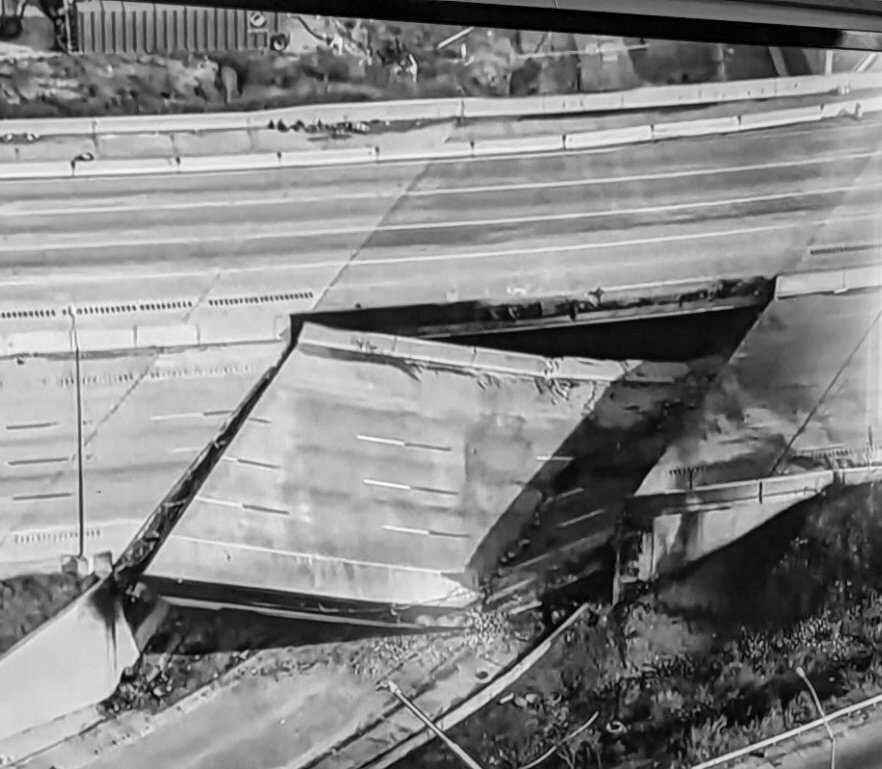

In [5]:
example_img = "https://pbs.twimg.com/media/FyV7PAEWwAADDKD.jpg"
# display(Image(example_img))
display(Image(example_img, width=200))


In [6]:
# webp file type

new_url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"
# display(Image(example_img))
from IPython.display import HTML, display

new_url_with_extension = new_url
print(new_url_with_extension)

# Generate HTML code to display the image with width set to 200 pixels
html_code = f'<img src="{new_url_with_extension}" width="200">'
print(html_code)

print("display the html image BEGIN")
display(HTML(html_code))
print("display the html image END")


https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG
<img src="https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG" width="200">
display the html image BEGIN


display the html image END


png
https://pbs.twimg.com/media/Fyl79T9aAAEIo6Q
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fyl79T9aAAEIo6Q', params='', query=None, fragment='')
{'format': ['png'], 'name': ['small']}
Fyl79T9aAAEIo6Q
https://pbs.twimg.com/media/Fyl79T9aAAEIo6Q.png


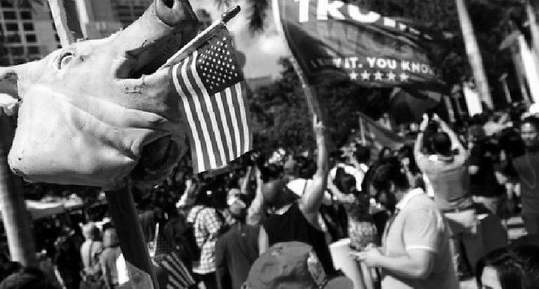

Content size of https://pbs.twimg.com/media/Fyl79T9aAAEIo6Q.png: 145322 bytes


jpg
https://pbs.twimg.com/media/Fyl-3DqaQAEGMix
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fyl-3DqaQAEGMix', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
Fyl-3DqaQAEGMix
https://pbs.twimg.com/media/Fyl-3DqaQAEGMix.jpg


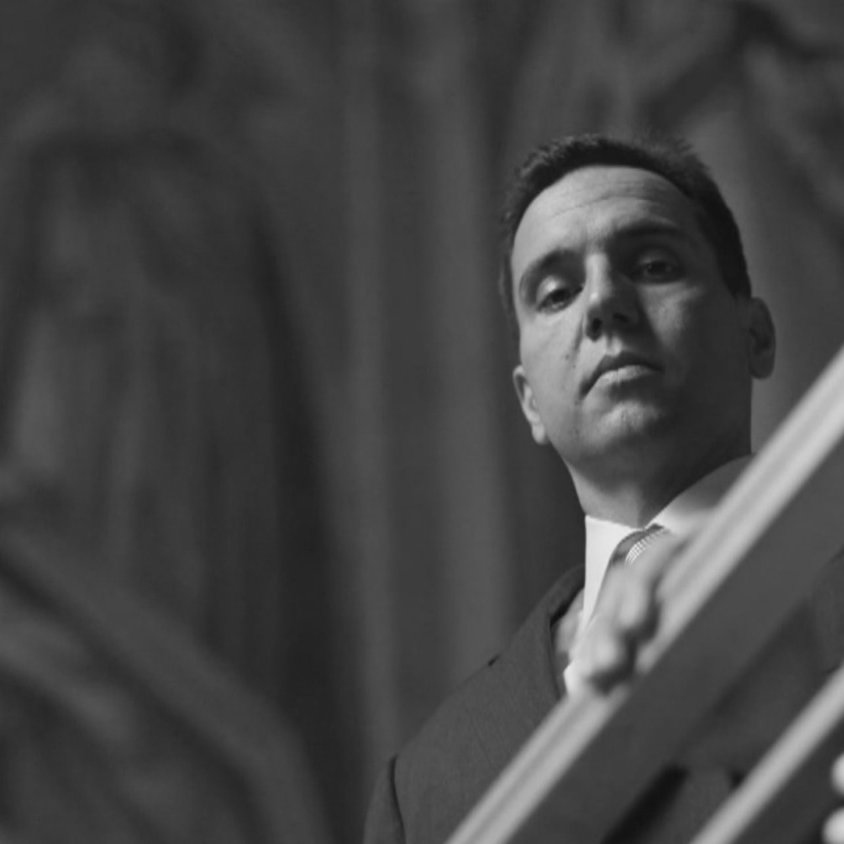

Content size of https://pbs.twimg.com/media/Fyl-3DqaQAEGMix.jpg: 40880 bytes


jpg
https://pbs.twimg.com/media/FynNBpSWAAI6R4P
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FynNBpSWAAI6R4P', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FynNBpSWAAI6R4P
https://pbs.twimg.com/media/FynNBpSWAAI6R4P.jpg


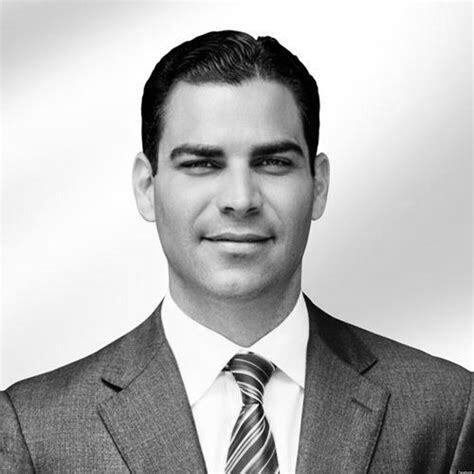

Content size of https://pbs.twimg.com/media/FynNBpSWAAI6R4P.jpg: 24375 bytes


jpg
https://pbs.twimg.com/media/Fyl-JDEaMAAaMax
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fyl-JDEaMAAaMax', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
Fyl-JDEaMAAaMax
https://pbs.twimg.com/media/Fyl-JDEaMAAaMax.jpg


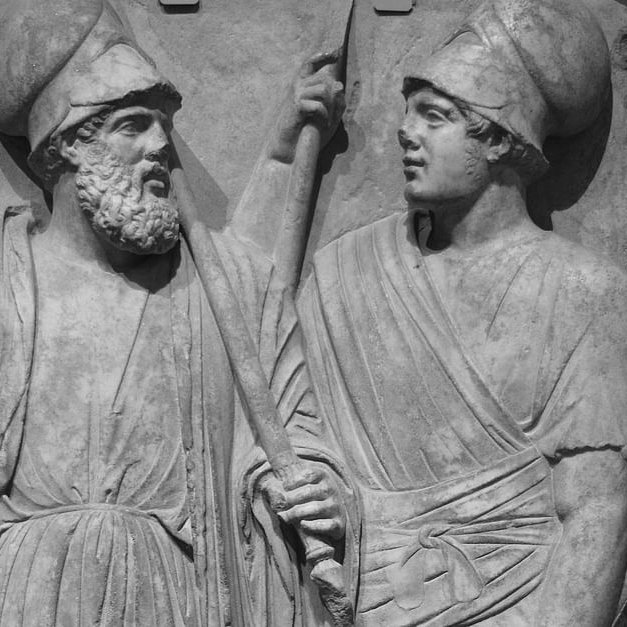

Content size of https://pbs.twimg.com/media/Fyl-JDEaMAAaMax.jpg: 85274 bytes


jpg
https://pbs.twimg.com/media/FyjE0VMacAAu0cD
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyjE0VMacAAu0cD', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyjE0VMacAAu0cD
https://pbs.twimg.com/media/FyjE0VMacAAu0cD.jpg


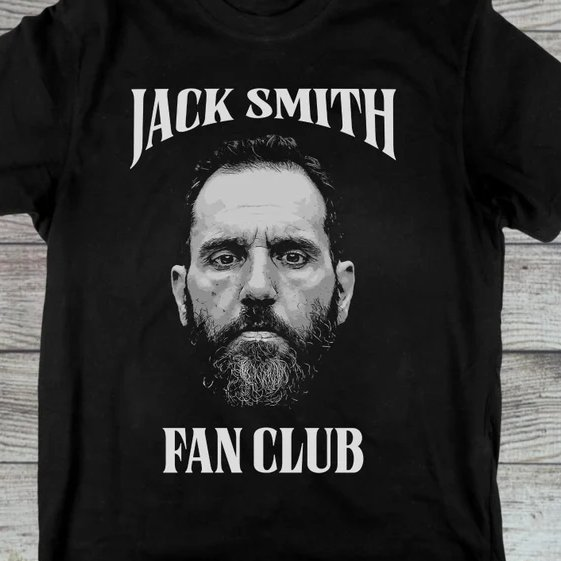

Content size of https://pbs.twimg.com/media/FyjE0VMacAAu0cD.jpg: 43663 bytes


jpg
https://pbs.twimg.com/media/FylHo0GWcAEKFEa
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FylHo0GWcAEKFEa', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FylHo0GWcAEKFEa
https://pbs.twimg.com/media/FylHo0GWcAEKFEa.jpg


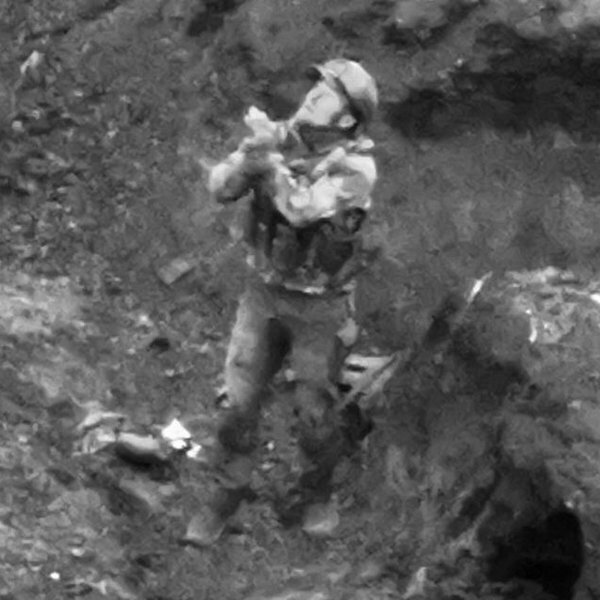

Content size of https://pbs.twimg.com/media/FylHo0GWcAEKFEa.jpg: 55326 bytes


jpg
https://pbs.twimg.com/media/FymtYk6WIAIgrj9
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FymtYk6WIAIgrj9', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FymtYk6WIAIgrj9
https://pbs.twimg.com/media/FymtYk6WIAIgrj9.jpg


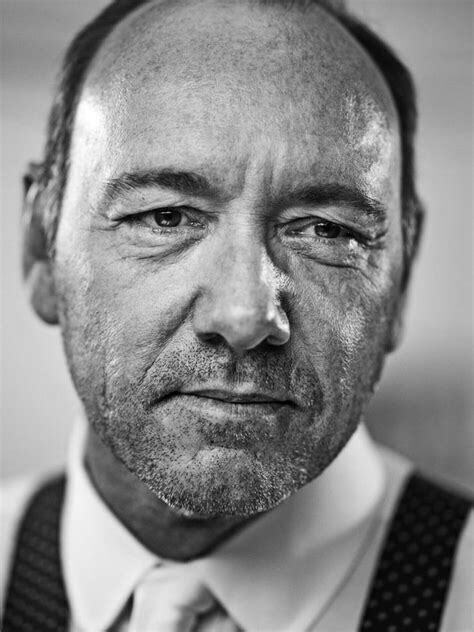

Content size of https://pbs.twimg.com/media/FymtYk6WIAIgrj9.jpg: 41540 bytes




In [7]:
# import os
# from urllib.parse import urlparse, parse_qs, urlunparse

for img in img_tags:
    src = img.get("src")
    if "https" in src:
        parsed_url = urlparse(src)
        query_params = parse_qs(parsed_url.query)
        extension = query_params.get('format', [''])[0]
        filename = os.path.basename(parsed_url.path)
        filename_with_extension = f"{filename}.{extension}"
        parsed_url = parsed_url._replace(query=None)
        new_url = urlunparse(parsed_url)

        print(extension)
        print(new_url)
        print(parsed_url)
        print(query_params)
        print(filename)
        # print(new_url_with_extension)

        if len(extension) > 0:
            # print("The extension is non-empty")
            new_url_with_extension = f"{new_url}.{extension}"
            print(new_url_with_extension)
            display(Image(new_url_with_extension, width=200))
            # file_size = os.path.getsize(new_url_with_extension)
            # print(file_size)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
        else:
            print("The extension is empty, omitting extension.")
            new_url_with_extension = new_url
            print(new_url_with_extension)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
            # Generate HTML code to display the image
            html_code = f'<img src="{new_url_with_extension}" width="200">'
            print(html_code)
            print("display the html image BEGIN")
            display(HTML(html_code))
            print("display the html image END")
    

        # display(Image(new_url_with_extension, width=200))
        print("\n")

        # print(extension)
        # print(new_url)
        # print(parsed_url)
        # print(query_params)
        # print(filename)
        # print(filename_with_extension)
        # display(Image(new_url + filename_with_extension.split('&')[0], width=200))


In [18]:
# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Iterate over the lines and print line number, content, and type (link or image)
for i, line in enumerate(lines, start=1):
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    if line.find("img"):
        line_type = "Image"

    print(f"Line {i}: {line_content} [{line_type}]")
    print(f"URL: {line_url}")

Line 1: Trump's main '24 election:  To save himself! [Link]
URL: https://www.cnn.com/2023/06/14/politics/donald-trump-indictment-2024-campaign/index.html
Line 2: Will Walt Nauta flip? He keeps valet close... [Link]
URL: https://www.msn.com/en-us/news/politics/will-walt-nauta-flip-trump-keeps-valet-close-as-question-hovers-over-the-case/ar-AA1cz2PA
Line 3: Republicans privately acknowledge legal woes getting more serious... [Link]
URL: https://www.nbcnews.com/politics/donald-trump/republicans-privately-acknowledge-trumps-legal-woes-are-serious-rcna88968
Line 4: Mar-A-Lago Sought Hundreds of Foreign Workers While Housing Classified Docs... [Link]
URL: https://www.forbes.com/sites/zacheverson/2023/06/14/mar-a-lago-foreign-workers-trump-classified-documents/?sh=733da962b6ba
Line 5: MAGA judge's Scant Criminal Trial Experience: 14 Days... [Link]
URL: https://dnyuz.com/2023/06/14/judge-in-trump-documents-case-has-scant-criminal-trial-experience/
Line 6: Fulton County DA: Federal indictment w

In [27]:
import requests
from bs4 import BeautifulSoup
import psycopg2
from datetime import datetime

# Make a request to the webpage
scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)
url = scrape_url  
response = requests.get(url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Connect to the PostgreSQL database
# conn = psycopg2.connect(
#     host="your_host",
#     database="your_database",
#     user="your_user",
#     password="your_password"
# )

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)

# Add 'sslmode=require' to the connection URL
# POSTGRES_URL += "?sslmode=require"

# print(POSTGRES_URL)

# Insert keyboard interrupt to stop the execution
# raise KeyboardInterrupt

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

# Initialize line_num as an integer
line_num = 0

current_datetime = datetime.now()

# Iterate over the lines and insert/update each line into the database
for line in lines:
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    # Increment line_num for each line
    line_num += 1

    if line.find("img"):
        line_type = "Image"
        line_content = line.get("src")
        print(f"Line {line_num}: Image found {line_content}")

    if bool(line_content):
        # Upsert the line into the database
        query = """
            INSERT INTO scraper_history (line_content, line_type, line_num, line_url, first_dt, latest_dt)
            VALUES (%s, %s, %s, %s, %s, %s)
            ON CONFLICT (line_content, line_url) DO UPDATE
            SET line_type = EXCLUDED.line_type,
                line_num = EXCLUDED.line_num,
                line_url = EXCLUDED.line_url,
                latest_dt = EXCLUDED.latest_dt
            WHERE scraper_history.latest_dt < EXCLUDED.latest_dt
        """
        data = (line_content, line_type, line_num, line_url, current_datetime, current_datetime)
        cursor.execute(query, data)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()


Line 9: Image found None


### Store the image in an S3 bucket

In [ ]:
# import requests
# import boto3

# URL of the webp image
url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"

# Send a GET request to the image URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Access the image content
    image_content = response.content

    # Store the image content in an S3 bucket
    s3 = boto3.client('s3')
    bucket_name = 'your-bucket-name'
    key = 'image.webp'  # Provide a desired key (filename) with the .webp extension
    s3.put_object(Body=image_content, Bucket=bucket_name, Key=key)

    print("Image successfully stored in S3.")

else:
    print("Failed to retrieve the image:", response.status_code)
